# Anomaly Detection Examples with Time Series Data by KNN

井出剛著「入門 機械学習による異常検知〜Rによる実践ガイド」P198 の例

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from sklearn.neighbors import NearestNeighbors

%matplotlib inline

### データの読み込み

In [2]:
url = 'http://www.cs.ucr.edu/~eamonn/discords/qtdbsel102.txt'
df = pd.read_csv(url, sep='\t', header=None, index_col=0)

### 訓練用、検証用データの分割とスライディングウィンドウ法によるデータのベクトル化

In [3]:
x = df[1]

In [4]:
n = len(x)
w = 100
nk = 5

In [5]:
xtr = x.iloc[0:3000].to_numpy()
dtr = np.array([ xtr[i:i+w].copy() for i in range(3000 - w) ])

In [6]:
xval = x.iloc[3001:6000].to_numpy()
dval = np.array([ xval[i:i+w].copy() for i in range(3000 - w) ])

### 最近傍法の適用

In [7]:
knn = NearestNeighbors(n_neighbors=nk, algorithm='auto')
knn.fit(dtr)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

### 学習済みモデルによる評価

In [8]:
distances, indices = knn.kneighbors(dval)

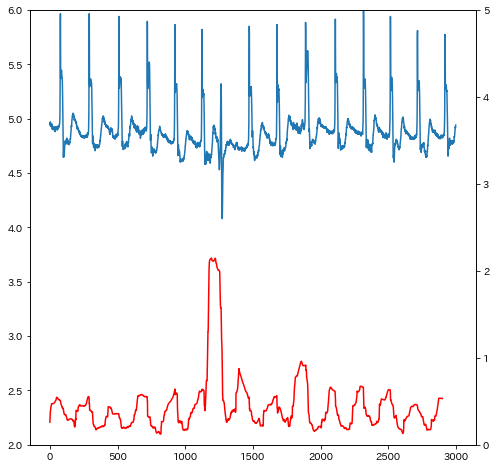

In [9]:
fig, ax1 = plt.subplots(figsize=(8,8))
ax1.plot(xval)
ax1.set_ylim(2, 6)
ax2 = ax1.twinx()
ax2.plot(distances[:,0], 'r')
ax2.set_ylim(0,5)
plt.show()